In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for charts
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load data 
invoices_df = pd.read_csv('../data/tbl_invoices.csv')
products_df = pd.read_csv('../data/tbl_products.csv')
test_df = pd.read_csv('../data/tbl_test.csv')

# Show first rows 
display(invoices_df.head())
display(products_df.head())
display(test_df.head())


,userid,datepaid,event_id,amount,product_name
0,324123,6/17/2020,2,100000.0,CloudServer
1,605334,5/29/2020,1,295000.0,CloudServer
2,293579,6/6/2020,1,150000.0,CloudServer
3,580248,3/5/2020,2,269000.0,CloudServer
4,375903,5/4/2020,4,325000.0,CloudServer


,event_id,event_name
0,2,cls_type1
1,5,cls_type2
2,6,cls_type3
3,4,cls_type4
4,1,cls_type5


,userid,ui_change,desc_change
0,534260.0,yes,no
1,593894.0,no,yes
2,418880.0,no,no
3,596930.0,yes,no
4,593681.0,no,no


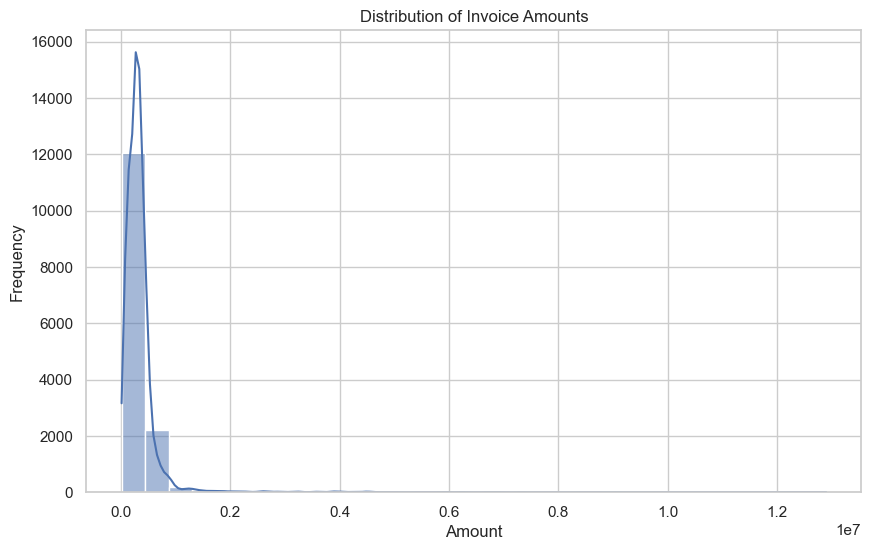

In [7]:
# Amount distirbution
plt.figure(figsize=(10, 6))
sns.histplot(invoices_df['amount'], bins=30, kde=True)
plt.title("Distribution of Invoice Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\daadb\AppData\Local\Temp\ipykernel_4828\541668419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=invoices_df, x='product_name', palette="viridis")


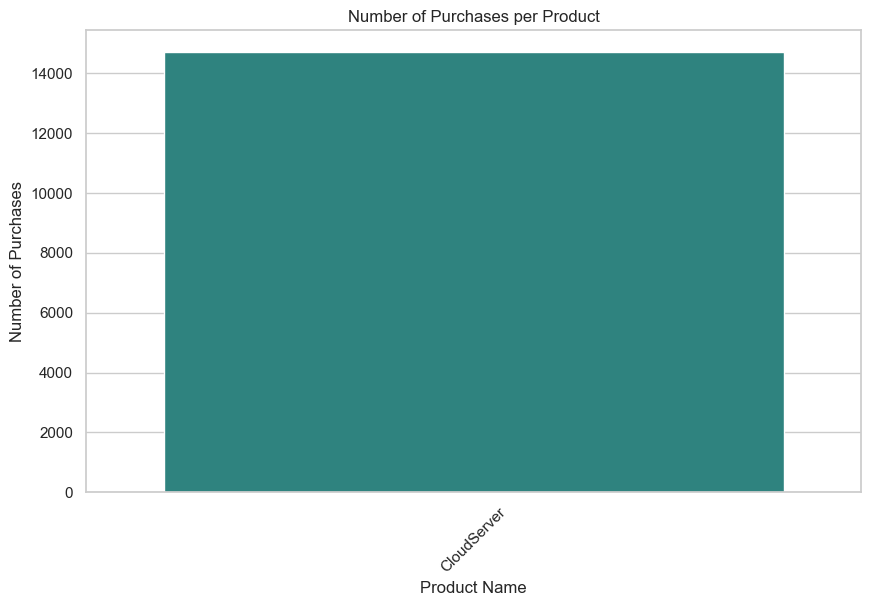

In [8]:
# Number of sales per product
plt.figure(figsize=(10, 6))
sns.countplot(data=invoices_df, x='product_name', palette="viridis")
plt.title("Number of Purchases per Product")
plt.xlabel("Product Name")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()


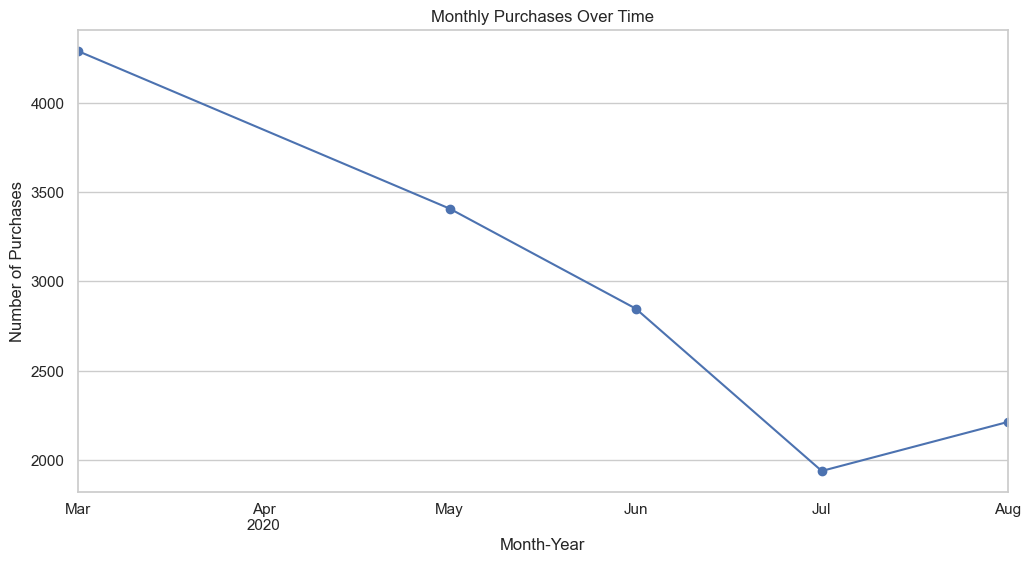

In [9]:
# Datepad column format 
invoices_df['datepaid'] = pd.to_datetime(invoices_df['datepaid'], format='%m/%d/%Y')

# Add column month-year to grouping
invoices_df['month_year'] = invoices_df['datepaid'].dt.to_period('M')

# Number of sales per month
monthly_purchases = invoices_df.groupby('month_year').size()

# Sale chart
plt.figure(figsize=(12, 6))
monthly_purchases.plot(kind='line', marker='o')
plt.title("Monthly Purchases Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
